Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking of missing value
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


this text is highly inbalance
0 = normal transaction
1 = fraud transaction

In [ ]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


using UNDEDR_SAMPLING beacause of data unbalance

In [ ]:
#taking same no of fraud and legit transaction
legit_sample = legit.sample(n=492)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13821,24508.0,-1.104709,1.132676,2.449432,3.031935,-0.656349,0.875282,-0.786581,0.908333,0.358330,...,0.047879,0.276575,-0.228698,-0.087142,0.108179,0.379412,0.198055,0.043364,22.67,0
199597,133045.0,0.146215,0.752398,-0.526622,1.003573,1.462247,-0.166709,0.646847,-0.455071,-0.252690,...,-0.256666,-0.397831,0.091549,-0.004058,-1.485200,0.419281,-0.158519,0.133269,4.49,0
232640,147246.0,-1.049623,-1.367135,-2.820833,-1.195739,1.217792,-1.420865,0.959676,0.067809,-1.705605,...,0.351688,0.740274,0.428844,-1.013121,-1.166599,0.700300,0.317856,0.103757,219.00,0
198263,132406.0,-0.409998,0.252199,-1.750280,-1.433029,3.403705,3.022004,0.244947,0.889137,-0.060188,...,-0.351969,-0.864235,0.546662,0.583912,-0.326668,0.169886,0.173639,0.018634,2.28,0
169040,119496.0,2.083046,-0.590988,-1.339483,-1.293625,-0.476892,-1.371192,-0.011799,-0.352496,1.997855,...,0.103266,0.705644,-0.001976,0.067874,0.283032,-0.051205,-0.001004,-0.063118,9.95,0


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96447.599593,-0.030166,-0.110988,-0.016373,-0.037796,0.024987,0.053077,0.001683,0.003452,0.007292,...,-0.045544,-0.012401,0.029714,-0.028159,0.026611,-0.023079,-0.009811,-0.015743,-0.023924,91.774472
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
x = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [ ]:
print (y )

13821     0
199597    0
232640    0
198263    0
169040    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
#spliting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming data is already split into X (features) and y (labels)

# Balancing the classes
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Split the resampled data
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Dictionary to store results
results = {}

# 1. K-Nearest Neighbors (KNN) with Grid Search
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_params = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn_pipeline, knn_params, scoring='f1', cv=5)
knn_grid.fit(x_train, y_train)
best_knn = knn_grid.best_estimator_
y_train_pred_knn = best_knn.predict(x_train)
y_test_pred_knn = best_knn.predict(x_test)

results['KNN'] = {
    'Training Accuracy': accuracy_score(y_train, y_train_pred_knn),
    'Testing Accuracy': accuracy_score(y_test, y_test_pred_knn),
    'F1 Score': f1_score(y_test, y_test_pred_knn)
}

# 2. Support Vector Machine (SVM) with Grid Search
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

svm_params = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(svm_pipeline, svm_params, scoring='f1', cv=5)
svm_grid.fit(x_train, y_train)
best_svm = svm_grid.best_estimator_
y_train_pred_svm = best_svm.predict(x_train)
y_test_pred_svm = best_svm.predict(x_test)

results['SVM'] = {
    'Training Accuracy': accuracy_score(y_train, y_train_pred_svm),
    'Testing Accuracy': accuracy_score(y_test, y_test_pred_svm),
    'F1 Score': f1_score(y_test, y_test_pred_svm)
}


#decision tree

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, scoring='f1', cv=5)
dt_grid.fit(x_train, y_train)
best_dt = dt_grid.best_estimator_
y_train_pred_dt = best_dt.predict(x_train)
y_test_pred_dt = best_dt.predict(x_test)

results['Decision Tree'] = {
    'Training Accuracy': accuracy_score(y_train, y_train_pred_dt),
    'Testing Accuracy': accuracy_score(y_test, y_test_pred_dt),
    'F1 Score': f1_score(y_test, y_test_pred_dt)
}

# Display results
for model, metrics in results.items():
    print(f"{model} Results:")
    print(f"  Training Accuracy: {metrics['Training Accuracy']:.4f}")
    print(f"  Testing Accuracy: {metrics['Testing Accuracy']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print()

KNN Results:
  Training Accuracy: 0.9441
  Testing Accuracy: 0.9239
  F1 Score: 0.9180

SVM Results:
  Training Accuracy: 0.9454
  Testing Accuracy: 0.9289
  F1 Score: 0.9255

Decision Tree Results:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9036
  F1 Score: 0.9016



In [ ]:
from sklearn.metrics import confusion_matrix

# Dictionary to store confusion matrices
confusion_matrices = {}

# Print results and confusion matrices for each model
for model_name, metrics in results.items():
    print(f"{model_name} Results:")
    print(f"  Training Accuracy: {metrics['Training Accuracy']:.4f}")
    print(f"  Testing Accuracy: {metrics['Testing Accuracy']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")

    # Get predictions for the test set
    if model_name == 'KNN':
        y_test_pred = y_test_pred_knn
    elif model_name == 'SVM':
        y_test_pred = y_test_pred_svm
    elif model_name == 'Decision Tree':
        y_test_pred = y_test_pred_dt

    # Calculate and print confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    confusion_matrices[model_name] = cm
    print("  Confusion Matrix:")
    print(cm)
    print()

KNN Results:
  Training Accuracy: 0.9441
  Testing Accuracy: 0.9239
  F1 Score: 0.9180
  Confusion Matrix:
[[98  1]
 [14 84]]

SVM Results:
  Training Accuracy: 0.9454
  Testing Accuracy: 0.9289
  F1 Score: 0.9255
  Confusion Matrix:
[[96  3]
 [11 87]]

Decision Tree Results:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9036
  F1 Score: 0.9016
  Confusion Matrix:
[[91  8]
 [11 87]]



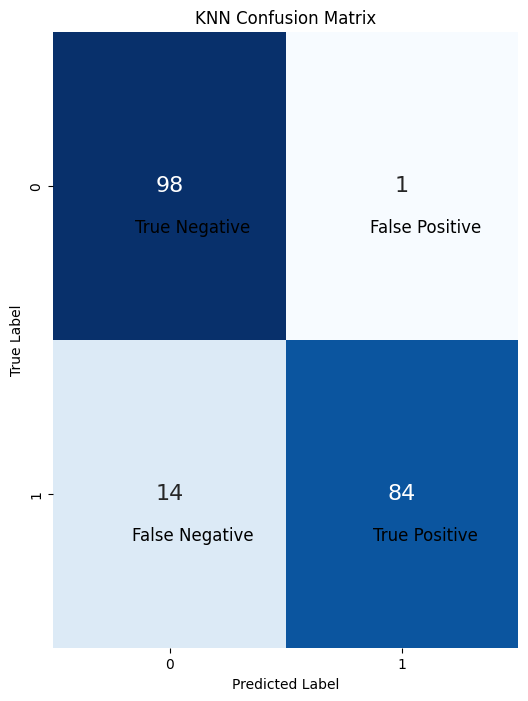

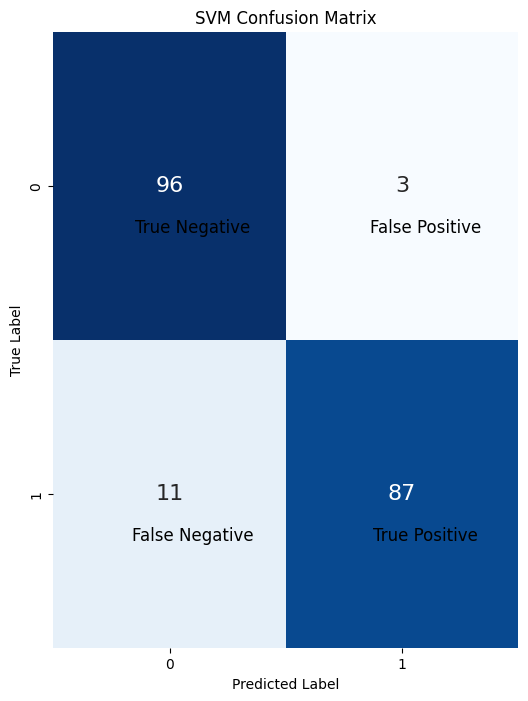

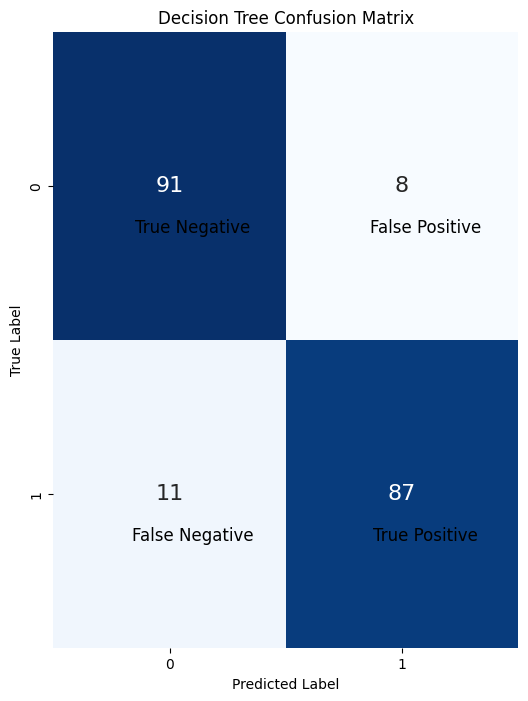

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    labels = np.array([["True Negative", "False Positive"], ["False Negative", "True Positive"]])

    for i in range(2):
        for j in range(2):
            plt.text(j + 0.6, i + 0.6, f"\n{labels[i, j]}",
                     ha="center", va="center", color="black", fontsize=12)

    plt.show()


for model_name, cm in confusion_matrices.items():
    plot_confusion_matrix(cm, model_name)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Updating the results dictionary to include more metrics
for model, preds in [('KNN', y_test_pred_knn), ('SVM', y_test_pred_svm), ('Decision Tree', y_test_pred_dt)]:
    print(f"\n{model} Results:")
    print(f"  Training Accuracy: {results[model]['Training Accuracy']:.4f}")
    print(f"  Testing Accuracy: {results[model]['Testing Accuracy']:.4f}")
    print(f"  F1 Score: {results[model]['F1 Score']:.4f}")

    # Calculate precision, recall
    precision = precision_score(y_test, preds, average='binary')
    recall = recall_score(y_test, preds, average='binary')

    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")

    # Print classification report
    print(f"\nClassification Report for {model}:\n")
    print(classification_report(y_test, preds))


KNN Results:
  Training Accuracy: 0.9441
  Testing Accuracy: 0.9239
  F1 Score: 0.9180
  Precision: 0.9882
  Recall: 0.8571

Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        99
           1       0.99      0.86      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197


SVM Results:
  Training Accuracy: 0.9454
  Testing Accuracy: 0.9289
  F1 Score: 0.9255
  Precision: 0.9667
  Recall: 0.8878

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        99
           1       0.97      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197


Decision Tree Results:
  Trai